In [18]:
 # Code from CoinMarketCap's API Documentation

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# Paramters for data pull, limiting to top 15 cryptocurrencies
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  # Created an account and added my personal API key 
  'X-CMC_PRO_API_KEY': '1a912d47-4ca4-4d9a-8f52-b8d5c3299c14',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# I ran "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in anaconda prompt
# This changes the limit of data being pulled
# Then used the local host link provided by the anaconda prompt to continue working on the project

{'status': {'timestamp': '2023-03-05T19:17:24.392Z', 'error_code': 0, 'error_message': None, 'elapsed': 42, 'credit_count': 1, 'notice': None, 'total_count': 9005}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9997, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [11]:
# Understanding the type of data
type(data)

dict

In [5]:
import pandas as pd

In [41]:
# Displaying all columns & row
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [32]:
# Storing data into a dataframe
df = pd.json_normalize(data['data'])

# Adding a 'timestamp' to understand when data was collected
df['timeStamp'] = pd.to_datetime('now', utc=True)

# Checking data
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timeStamp
0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930920e+07,1.930920e+07,NaN,1,NaN,NaN,None,2023-03-05T19:16:00.000Z,22445.347065,1.332318e+10,13.2455,0.001191,0.594419,-4.284473,-4.250443,32.859483,31.684300,4.334017e+11,42.1770,4.713523e+11,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-05T19:16:00.000Z,1569.128961,5.001785e+09,8.9310,0.003402,0.369601,-3.600244,-5.393863,24.830491,24.332476,1.920204e+11,18.6864,1.920204e+11,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
2,825,Tether,USDT,tether,48772,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.144275e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-03-05T19:16:00.000Z,1.000102,2.018895e+10,11.9519,-0.001142,-0.002286,0.000588,-0.002629,0.034392,0.001806,7.145001e+10,6.9531,7.314920e+10,None,2023-03-05T19:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-05 20:07:46.609422+00:00
3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578942e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-05T19:16:00.000Z,290.275411,3.109286e+08,18.9367,-0.127619,0.122473,-5.829989,-12.566065,12.321714,0.432790,4.583280e+10,4.4602,4.643825e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
4,3408,USD Coin,USDC,usd-coin,10446,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.390831e+10,4.390831e+10,NaN,5,NaN,NaN,None,2023-03-05T19:16:00.000Z,1.000092,2.443382e+09,5.3082,0.008895,0.021163,0.004666,0.009124,0.005484,0.024077,4.391234e+10,4.2735,4.391234e+10,None,2023-03-05T19:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-05 20:07:46.609422+00:00
5,52,XRP,XRP,xrp,898,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-05T19:16:00.000Z,0.370133,5.119930e+08,-13.1964,-0.096407,-1.275237,-2.440950,-9.543266,6.507857,-5.405673,1.885861e+10,1.8352,3.701329e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
6,2010,Cardano,ADA,cardano,663,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.468008e+10,3.553818e+10,NaN,7,NaN,NaN,None,2023-03-05T19:16:00.000Z,0.337176,1.913919e+08,20.1849,-0.012909,-0.538324,-7.966193,-16.921715,26.236859,5.158154,1.169331e+10,1.1379,1.517294e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
7,3890,Polygon,MATIC,polygon,599,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-05T19:16:00.000Z,1.147202,3.777656e+08,43.7859,0.750933,1.342327,-10.122536,-6.879517,42.407928,25.266198,1.002003e+10,0.9751,1.147202e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
8,74,Dogecoin,DOGE,dogecoin,650,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11

In [38]:
def api_executer():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Paramters for data pull, limiting to top 15 cryptocurrencies
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      # Created an account and added my personal API key 
      'X-CMC_PRO_API_KEY': '1a912d47-4ca4-4d9a-8f52-b8d5c3299c14',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Storing data into a dataframe
    df2 = pd.json_normalize(data['data'])

    # Adding a 'timestamp' to understand when data was collected
    df2['timeStamp'] = pd.to_datetime('now', utc=True)

    # Appending new pull to older data frame
    df = pd.concat([df, df2])
        

In [39]:
import os
from time import time
from time import sleep

# For loop that runs slightly lesser than available API credits per day (333 creds avaialable per day)
for i in range(300):
    api_executer()
    print('API Executer ran successfully')
    # Sleep for 1 minute
    sleep(60)
exit()

API Executer ran successfully
API Executer ran successfully
API Executer ran successfully
API Executer ran successfully
API Executer ran successfully
API Executer ran successfully
API Executer ran successfully


KeyboardInterrupt: 

In [42]:
# Throught 'timeStamp' we can see that data was pulled and appended every minute for 8 minutes
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timeStamp
0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930920e+07,1.930920e+07,NaN,1,NaN,NaN,None,2023-03-05T19:16:00.000Z,22445.347065,1.332318e+10,13.2455,0.001191,0.594419,-4.284473,-4.250443,32.859483,31.684300,4.334017e+11,42.1770,4.713523e+11,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-05T19:16:00.000Z,1569.128961,5.001785e+09,8.9310,0.003402,0.369601,-3.600244,-5.393863,24.830491,24.332476,1.920204e+11,18.6864,1.920204e+11,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
2,825,Tether,USDT,tether,48772,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.144275e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-03-05T19:16:00.000Z,1.000102,2.018895e+10,11.9519,-0.001142,-0.002286,0.000588,-0.002629,0.034392,0.001806,7.145001e+10,6.9531,7.314920e+10,None,2023-03-05T19:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-05 20:07:46.609422+00:00
3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578942e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-05T19:16:00.000Z,290.275411,3.109286e+08,18.9367,-0.127619,0.122473,-5.829989,-12.566065,12.321714,0.432790,4.583280e+10,4.4602,4.643825e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
4,3408,USD Coin,USDC,usd-coin,10446,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.390831e+10,4.390831e+10,NaN,5,NaN,NaN,None,2023-03-05T19:16:00.000Z,1.000092,2.443382e+09,5.3082,0.008895,0.021163,0.004666,0.009124,0.005484,0.024077,4.391234e+10,4.2735,4.391234e+10,None,2023-03-05T19:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-05 20:07:46.609422+00:00
5,52,XRP,XRP,xrp,898,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-05T19:16:00.000Z,0.370133,5.119930e+08,-13.1964,-0.096407,-1.275237,-2.440950,-9.543266,6.507857,-5.405673,1.885861e+10,1.8352,3.701329e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
6,2010,Cardano,ADA,cardano,663,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.468008e+10,3.553818e+10,NaN,7,NaN,NaN,None,2023-03-05T19:16:00.000Z,0.337176,1.913919e+08,20.1849,-0.012909,-0.538324,-7.966193,-16.921715,26.236859,5.158154,1.169331e+10,1.1379,1.517294e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
7,3890,Polygon,MATIC,polygon,599,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-05T19:16:00.000Z,1.147202,3.777656e+08,43.7859,0.750933,1.342327,-10.122536,-6.879517,42.407928,25.266198,1.002003e+10,0.9751,1.147202e+10,None,2023-03-05T19:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:07:46.609422+00:00
8,74,Dogecoin,DOGE,dogecoin,650,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11

In [44]:
# optimizing 'api_executer' function to export data to a CSV file
def api_executer_csv():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Paramters for data pull, limiting to top 15 cryptocurrencies
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      # Created an account and added my personal API key 
      'X-CMC_PRO_API_KEY': '1a912d47-4ca4-4d9a-8f52-b8d5c3299c14',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Storing data into a dataframe
    df = pd.json_normalize(data['data'])
    # Adding a 'timestamp' to understand when data was collected
    df['timeStamp'] = pd.to_datetime('now', utc=True)
    df
    
    # Exporting data to a CSV file after checking if a file of that name already exists,
    # if file already exists then appends data to pre-existing file
    if not os.path.isfile(r'C:\Users\arsul\OneDrive\Desktop\DA Portfolio\Python - Automation & API\API.csv'):
        df.to_csv(r'C:\Users\arsul\OneDrive\Desktop\DA Portfolio\Python - Automation & API\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\arsul\OneDrive\Desktop\DA Portfolio\Python - Automation & API\API.csv', mode='a', header=False)

In [45]:
import os
from time import time
from time import sleep

# For loop that runs slightly lesser than available API credits per day (333 creds avaialable per day)
for i in range(300):
    api_executer_csv()
    print('API Executer ran successfully and exported data to csv')
    # Sleep for 1 minute
    sleep(60)
exit()


API Executer ran successfully and exported data to csv
API Executer ran successfully and exported data to csv
API Executer ran successfully and exported data to csv
API Executer ran successfully and exported data to csv
API Executer ran successfully and exported data to csv
API Executer ran successfully and exported data to csv


KeyboardInterrupt: 

In [46]:
# Reading data from CSV
df10 = pd.read_csv(r'C:\Users\arsul\OneDrive\Desktop\DA Portfolio\Python - Automation & API\API.csv')
df10

# 'timeStamp' can confirm that API ran for 6 minutes

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timeStamp
0,0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.930928e+07,1.930928e+07,NaN,1,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,22433.191201,1.319712e+10,14.4703,-0.075448,0.814507,-4.569967,-3.990118,33.196742,32.383975,4.331687e+11,42.1850,4.710970e+11,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
1,1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1568.798071,4.953268e+09,12.2653,-0.042119,0.652861,-3.884231,-5.163532,25.229230,24.905319,1.919799e+11,18.6889,1.919799e+11,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
2,2,825,Tether,USDT,tether,48774,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.144275e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1.000101,1.971002e+10,8.7961,-0.001236,-0.001839,0.000764,-0.006445,0.026487,0.001344,7.144998e+10,6.9555,7.314917e+10,NaN,2023-03-05T20:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-05 20:26:08.674309+00:00
3,3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578942e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,289.862160,3.040390e+08,14.0497,-0.157228,0.479862,-6.081833,-12.215454,12.705273,1.060583,4.576754e+10,4.4557,4.637214e+10,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
4,4,3408,USD Coin,USDC,usd-coin,10446,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.391448e+10,4.391448e+10,NaN,5,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1.000061,2.404358e+09,3.7414,-0.000374,0.005272,-0.000891,0.007440,0.014624,0.021690,4.391715e+10,4.2763,4.391715e+10,NaN,2023-03-05T20:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-05 20:26:08.674309+00:00
5,5,52,XRP,XRP,xrp,898,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,0.368971,4.998856e+08,-16.5858,-0.285398,-1.343559,-2.757982,-10.032589,6.368527,-4.223497,1.879939e+10,1.8302,3.689707e+10,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
6,6,2010,Cardano,ADA,cardano,663,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.468051e+10,3.553818e+10,NaN,7,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,0.337814,1.882700e+08,20.7104,0.172497,0.838309,-8.023934,-16.200950,27.279855,6.311093,1.171556e+10,1.1405,1.520162e+10,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
7,7,3890,Polygon,MATIC,polygon,599,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1.148127,3.560242e+08,37.7716,0.066597,2.521339,-10.862328,-6.011535,43.056134,26.780796,1.002810e+10,0.9764,1.148127e+10,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
8,8,74,Dogecoin,DOGE,dogecoin,650,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",

In [47]:
# -- -- -- -- -- Data Transformation Starts here -- -- -- -- --

# Changing scientific notation to display numbers fully
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [51]:
# Returning to 'df10'
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timeStamp
0,0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19309275.00000,19309275.00000,NaN,1,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,22433.19120,13197116499.71836,14.47030,-0.07545,0.81451,-4.56997,-3.99012,33.19674,32.38397,433168658018.68762,42.18500,471097015211.21002,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
1,1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1568.79807,4953267897.71392,12.26530,-0.04212,0.65286,-3.88423,-5.16353,25.22923,24.90532,191979885321.77161,18.68890,191979885321.76999,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
2,2,825,Tether,USDT,tether,48774,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,71442748181.91571,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1.00010,19710017805.38492,8.79610,-0.00124,-0.00184,0.00076,-0.00644,0.02649,0.00134,71449982451.98663,6.95550,73149172633.34000,NaN,2023-03-05T20:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-05 20:26:08.674309+00:00
3,3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157894168.21769,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,289.86216,304038993.49319,14.04970,-0.15723,0.47986,-6.08183,-12.21545,12.70527,1.06058,45767544656.10088,4.45570,46372137808.23000,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
4,4,3408,USD Coin,USDC,usd-coin,10446,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43914480748.34384,43914480748.34384,NaN,5,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1.00006,2404358189.41534,3.74140,-0.00037,0.00527,-0.00089,0.00744,0.01462,0.02169,43917147527.77925,4.27630,43917147527.78000,NaN,2023-03-05T20:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-05 20:26:08.674309+00:00
5,5,52,XRP,XRP,xrp,898,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,0.36897,499885570.86082,-16.58580,-0.28540,-1.34356,-2.75798,-10.03259,6.36853,-4.22350,18799393032.39467,1.83020,36897068068.66000,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
6,6,2010,Cardano,ADA,cardano,663,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34680514609.87800,35538184453.81200,NaN,7,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,0.33781,188269996.73123,20.71040,0.17250,0.83831,-8.02393,-16.20095,27.27985,6.31109,11715555610.70191,1.14050,15201619941.69000,NaN,2023-03-05T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-05 20:26:08.674309+00:00
7,7,3890,Polygon,MATIC,polygon,599,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,NaN,2023-03-05T20:24:00.000Z,1.14813,356024166.70244,37.77160,0.06660,2.52134,-10.86233,-6.01153,43.05613,26.78080,10028102670.25921,0.97640,11481266508.39000,NaN,2023-03-05T20:24:00.000Z

In [50]:
# Grouping data by name of cryptocurrency and running a mean on percetange change columns 
df3 = df10.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.02706,0.75794,-4.64451,-4.00636,33.17485,32.40117
Ethereum,0.03371,0.60808,-3.94265,-5.16408,25.24448,24.89247
Tether,0.00146,0.00141,0.00408,-0.00303,0.02813,0.00411
BNB,-0.11332,0.46233,-6.13709,-12.19065,12.73363,1.01530
USD Coin,0.00468,-0.00429,-0.00952,0.00509,0.01081,0.01042
XRP,-0.19639,-1.39595,-2.78621,-10.02961,6.44233,-4.26578
Cardano,0.20847,0.73253,-8.09529,-16.14667,27.43468,6.27551
Polygon,0.08979,2.48635,-11.00972,-6.06329,43.13929,26.85929
Dogecoin,0.19014,0.66205,-8.31140,-17.73302,4.32035,-25.47090


In [52]:
# Stacking data so it can be used for visualization
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.02706
             quote.USD.percent_change_24h     0.75794
             quote.USD.percent_change_7d     -4.64451
             quote.USD.percent_change_30d    -4.00636
             quote.USD.percent_change_60d    33.17485
             quote.USD.percent_change_90d    32.40117
Ethereum     quote.USD.percent_change_1h      0.03371
             quote.USD.percent_change_24h     0.60808
             quote.USD.percent_change_7d     -3.94265
             quote.USD.percent_change_30d    -5.16408
             quote.USD.percent_change_60d    25.24448
             quote.USD.percent_change_90d    24.89247
Tether       quote.USD.percent_change_1h      0.00146
             quote.USD.percent_change_24h     0.00141
             quote.USD.percent_change_7d      0.00408
             quote.USD.percent_change_30d    -0.00303
             quote.USD.percent_change_60d     0.02813
             quote.USD.percent_change_90

In [54]:
# Understanding data type
type(df4)

pandas.core.series.Series

In [55]:
# Changing from series back to dataframe
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.02706
            quote.USD.percent_change_24h   0.75794
            quote.USD.percent_change_7d   -4.64451
            quote.USD.percent_change_30d  -4.00636
            quote.USD.percent_change_60d  33.17485
            quote.USD.percent_change_90d  32.40117
Ethereum    quote.USD.percent_change_1h    0.03371
            quote.USD.percent_change_24h   0.60808
            quote.USD.percent_change_7d   -3.94265
            quote.USD.percent_change_30d  -5.16408
            quote.USD.percent_change_60d  25.24448
            quote.USD.percent_change_90d  24.89247
Tether      quote.USD.percent_change_1h    0.00146
            quote.USD.percent_change_24h   0.00141
            quote.USD.percent_change_7d    0.00408
            quote.USD.percent_change_30d  -0.00303
            quote.USD.percent_change_60d   0.02813
            quote.USD.percent_change_90d   0.00411
BNB         quote.USD.percent_change_1h   -0.11332
            quote.USD.percent_change_24h   0.46233
            quote.USD.percent_change_7d   -6.13709
            quote.USD.percent_change_30d -12.19065
            quote.USD.percent_change_60d  12.73363
            quote.USD.percent_change_90d   1.01530
USD Coin    quote.USD.percent_change_1h    0.00468
            quote.USD.percent_change_24h  -0.00429
            quote.USD.percent_change_7d   -0.00952
            quote.USD.percent_change_30d   0.00509
            quote.USD.percent_change_60d   0.01081
            quote.USD.percent_change_90d   0.01042
XRP         quote.USD.percent_change_1h   -0.19639
            quote.USD.percent_change_24h  -1.39595
            quote.USD.percent_change_7d   -2.78621
            quote.USD.percent_change_30d -10.02961
            quote.USD.percent_change_60d   6.44233
            quote.USD.percent_change_90d  -4.26578
Cardano     quote.USD.percent_change_1h    0.20847
            quote.USD.percent_change_24h   0.73253
            quote.USD.percent_change_7d   -8.09529
            quote.USD.percent_change_30d -16.14667
            quote.USD.percent_change_60d  27.43468
            quote.USD.percent_change_90d   6.27551
Polygon     quote.USD.percent_change_1h    0.08979
            quote.USD.percent_change_24h   2.48635
            quote.USD.percent_change_7d  -11.00972
            quote.USD.percent_change_30d  -6.06329
            quote.USD.percent_change_60d  43.13929
            quote.USD.percent_change_90d  26.85929
Dogecoin    quote.USD.percent_change_1h    0.19014
            quote.USD.percent_change_24h   0.66205
            quote.USD.percent_change_7d   -8.31140
            quote.USD.percent_change_30d -17.73302
            quote.USD.percent_change_60d   4.32035
            quote.USD.percent_change_90d -25.47090
Binance USD quote.USD.percent_change_1h    0.00264
            quote.USD.percent_change_24h   0.00532
            quote.USD.percent_change_7d   -0.00967
            quote.USD.percent_change_30d   0.02145
            quote.USD.percent_change_60d   0.03421
            quote.USD.percent_change_90d   0.04745
Solana      quote.USD.percent_change_1h    0.31042
            quote.USD.percent_change_24h   2.44310
            quote.USD.percent_change_7d   -9.40852
            quote.USD.percent_change_30d -13.63798
            quote.USD.percent_change_60d  62.80025
            quote.USD.percent_change_90d  54.58282
Polkadot    quote.USD.percent_change_1h    0.18839
            quote.USD.percent_change_24h   2.43975
            quote.USD.percent_change_7d  -10.11253
            quote.USD.percent_change_30d -13.66313
            quote.USD.percent_change_60d  30.32938
            quote.USD.percent_change_90d  10.05586
Litecoin    quote.USD.percent_change_1h   -0.02521
            quote.USD.percent_change_24h   1.56429
            quote.USD.percent_change_7d   -5.11351
            quote.USD.percent_change_30d  -9.08276
            quote.USD.percent_change_60d  20.45777
            quo

In [68]:
type(df5)

pandas.core.frame.DataFrame

In [69]:
# Counting number of rows so I can index it
df5.count()

values    90
dtype: int64

In [73]:
# Setting up index
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02706
1,Bitcoin,quote.USD.percent_change_24h,0.75794
2,Bitcoin,quote.USD.percent_change_7d,-4.64451
3,Bitcoin,quote.USD.percent_change_30d,-4.00636
4,Bitcoin,quote.USD.percent_change_60d,33.17485
5,Bitcoin,quote.USD.percent_change_90d,32.40117
6,Ethereum,quote.USD.percent_change_1h,0.03371
7,Ethereum,quote.USD.percent_change_24h,0.60808
8,Ethereum,quote.USD.percent_change_7d,-3.94265
9,Ethereum,quote.USD.percent_change_30d,-5.16408


In [75]:
# Changing column name
df7 = df6.rename(columns={'level_1': 'Percent_Change'})
df7

,name,Percent_Change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02706
1,Bitcoin,quote.USD.percent_change_24h,0.75794
2,Bitcoin,quote.USD.percent_change_7d,-4.64451
3,Bitcoin,quote.USD.percent_change_30d,-4.00636
4,Bitcoin,quote.USD.percent_change_60d,33.17485
5,Bitcoin,quote.USD.percent_change_90d,32.40117
6,Ethereum,quote.USD.percent_change_1h,0.03371
7,Ethereum,quote.USD.percent_change_24h,0.60808
8,Ethereum,quote.USD.percent_change_7d,-3.94265
9,Ethereum,quote.USD.percent_change_30d,-5.16408


In [83]:
# Transforming data in rows to a abbreviated version for cleaner visualizations later
df7['Percent_Change'] = df7['Percent_Change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1H','24H','7D','30D','60D','90D'])
df7

,name,Percent_Change,values
0,Bitcoin,1H,-0.02706
1,Bitcoin,24H,0.75794
2,Bitcoin,7D,-4.64451
3,Bitcoin,30D,-4.00636
4,Bitcoin,60D,33.17485
5,Bitcoin,90D,32.40117
6,Ethereum,1H,0.03371
7,Ethereum,24H,0.60808
8,Ethereum,7D,-3.94265
9,Ethereum,30D,-5.16408


In [76]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

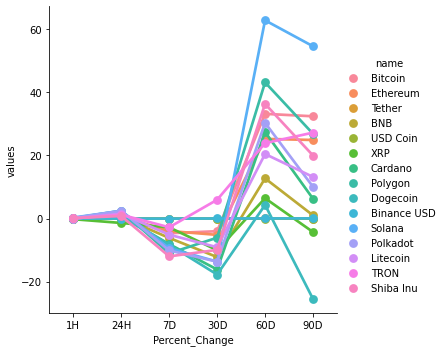

In [85]:
# Understanding how currencies have changed over 90 days
sns.catplot(x='Percent_Change', y='values', hue='name', data=df7, kind='point')

In [104]:
# Selecting Specific columns from 'df10'
df8 = df10[['name','quote.USD.price','timeStamp']]

# Selecting a specific currency
df8 = df8.query("name =='Bitcoin'")
df8
# Data shows price fluctuations over 6 minutes

,name,quote.USD.price,timeStamp
0,Bitcoin,22433.19120,2023-03-05 20:26:08.674309+00:00
15,Bitcoin,22429.36494,2023-03-05 20:27:08.967292+00:00
30,Bitcoin,22429.31980,2023-03-05 20:28:09.177193+00:00
45,Bitcoin,22427.40067,2023-03-05 20:29:09.366323+00:00
60,Bitcoin,22428.74046,2023-03-05 20:30:09.606509+00:00
75,Bitcoin,22427.62970,2023-03-05 20:31:10.002952+00:00


<AxesSubplot:xlabel='timeStamp', ylabel='quote.USD.price'>

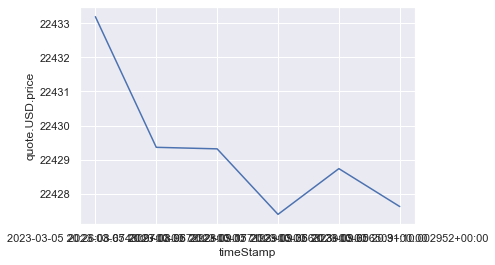

In [105]:
# Visualizing Bitcoin's Price fluctuation

sns.set_theme(style="darkgrid")

sns.lineplot(x='timeStamp', y='quote.USD.price', data=df8)

In [ ]:
# Python - Automation and API project by ArsalmShams 